# Exploring spike trains

In this example we will explore the spike sorting data

In [9]:
from pathlib import Path
import sys

import numpy as np
import matplotlib.pyplot as plt

import one.alf.io as alfio
from brainbox.io.one import _channels_alf2bunch
from iblatlas.regions import BrainRegions
from brainbox.plot import driftmap
from ibl_style.style import figure_style
import brainbox.ephys_plots

figure_style()

regions = BrainRegions()

if sys.platform == 'win32':
    # Windows paths
    np1_data = Path(r'C:\Users\TeachingLab\Documents\Cajal2025\2025-06-15_spike-sorting-IBL\data\cajal\np1')
    np2_data = Path(r'C:\Users\TeachingLab\Documents\Cajal2025\2025-06-15_spike-sorting-IBL\data\cajal\np2')
else:
    # macOS or Linux paths
    np1_data = Path.home().joinpath('Documents/Cajal2025/2025-06-15_spike-sorting-IBL/data/cajal/np1')
    np2_data = Path.home().joinpath('Documents/Cajal2025/2025-06-15_spike-sorting-IBL/data/cajal/np2')

ss_path = np1_data.joinpath('spikesorting')
spikes = alfio.load_object(ss_path, 'spikes')
clusters = alfio.load_object(ss_path, 'clusters')
channels = alfio.load_object(ss_path, 'channels')
channels = _channels_alf2bunch(channels, brain_regions=regions)

## Linking spike sorting objects

Let's explore the keys of the different data dictionaries

In [2]:
print(f"Spikes keys: {spikes.keys()}")
print(f"\nClusters keys: {clusters.keys()}")
print(f"Channels keys: {channels.keys()}")

Spikes keys: dict_keys(['amps', 'clusters', 'depths', 'samples', 'times'])

Clusters keys: dict_keys(['channels', 'depths', 'metrics', 'uuids'])
Channels keys: dict_keys(['x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um', 'lateral_um', 'labels', 'rawInd'])


Notice how the spikes object has an attribute `clusters` and the clusters object and attribute `channels`. These linking attributes allow us to link data from the different objects. For example imagine we want to assign a channel to each spike, we would do the following

In [3]:
spike_channels = clusters['channels'][spikes['clusters']]

Using the same logic see if you can assign an `acronym` stored in the channels object to each spike

## Finding good clusters

The spike data contains data from clusters that have been assigned as both good and bad according to the single unit quality metrics that we have applied to the data. We can use the `label` field in the `clusters['metrics']` to filter by good clusters

In [4]:
good_clust_idx = np.where(clusters['metrics']['label'] == 1)[0]
good_spike_idx = np.isin(spikes.clusters, good_clust_idx)

spikes_good = {k: spikes[k][good_spike_idx] for k in spikes.keys()}

## Plotting a raster map of activity

Here we show an example of plotting a raster map of the spike sorting data for all units and when restricting by good units. Since in this case, we do have some histology information (which is unlikely just after an experiment), we will also display the brain regions on the right.

(<Figure size 1600x900 with 2 Axes>, <Axes: >)

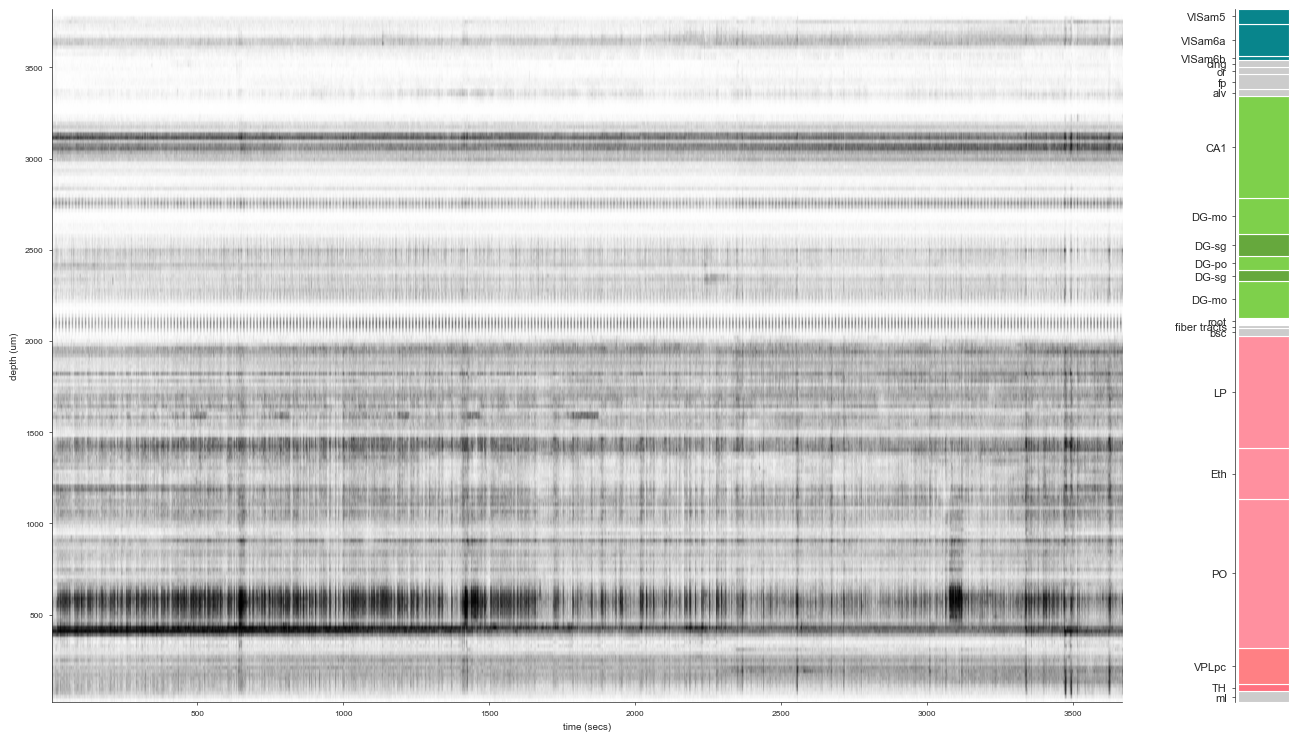

In [7]:
fig, axs = plt.subplots(1, 2, gridspec_kw={
    'width_ratios': [.95, .05]}, figsize=(16, 9), sharex='col')
# This is displaying the raster map for all units
driftmap(spikes['times'], spikes['depths'], t_bin=0.1, ax=axs[0])
# This is displaying the brain regions annotations on the right
brainbox.ephys_plots.plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'],brain_regions=regions, display=True, ax=axs[1])

(<Figure size 1600x900 with 2 Axes>, <Axes: >)

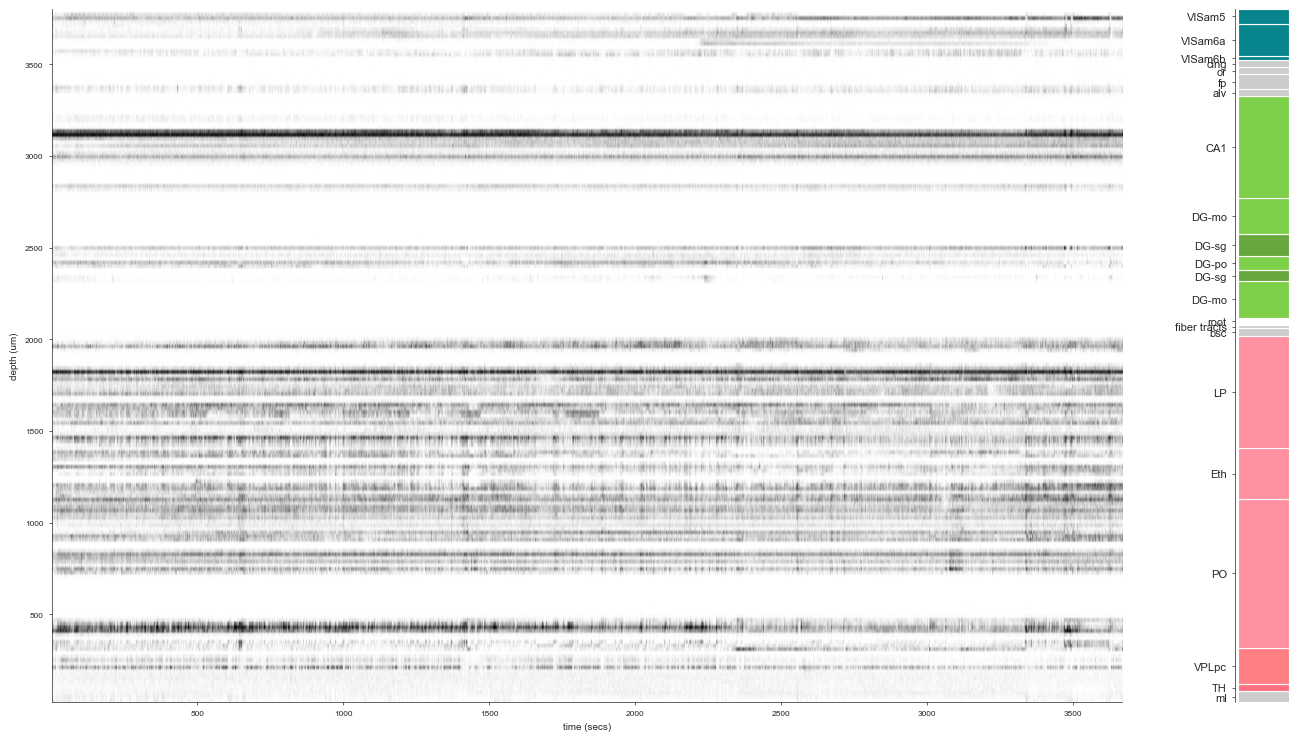

In [8]:
# Raster plot for good units
fig, axs = plt.subplots(1, 2, gridspec_kw={
    'width_ratios': [.95, .05]}, figsize=(16, 9), sharex='col')
# This is displaying the raster map for all units
driftmap(spikes_good['times'], spikes_good['depths'], t_bin=0.1, ax=axs[0])
# This is displaying the brain regions annotations on the right
brainbox.ephys_plots.plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'],brain_regions=regions, display=True, ax=axs[1])